# Методы анализа и обработки изображения

---

ЛР0 - Вводная

Студентка гр. РИМ-181226

Бабайлова Маргарита Леонидовна

In [21]:
from skimage.io import imread, imshow, imsave

img = imread ('1.png')

sizes = img.shape

In [22]:
img[sizes[0]//2, sizes[1]//2] = [120, 100, 50]
img[sizes[0]//2 - 15:sizes[0]//2 + 15, sizes[1]//2 - 15:sizes[1]//2 + 15] = [255, 192, 203]
imsave('v1.png', img)

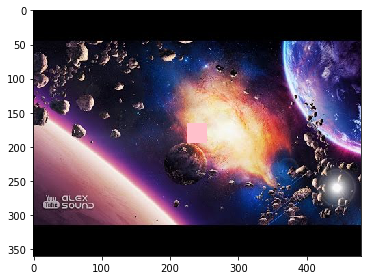

In [23]:
imshow('v1.png')

Создаем рамку слева размером 42 px

In [24]:
img = imread ('1.png')
frame_color = [0,0,0]
frame_size = 42

img[0:sizes[0], 0:frame_size] = frame_color #left
imsave('v2.png', img)

AxesImage(14.36,27.8;406.84x245.702)


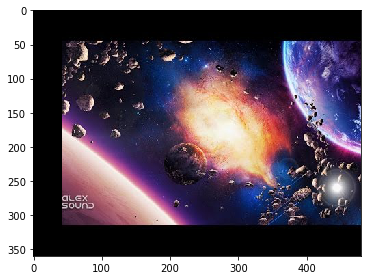

In [25]:
print(imshow('v2.png'))

In [26]:
calculeted_frame_size = 0
for i in range(0, sizes[0]):
    if all (img[i,sizes[0]//2]!= frame_color):
        calculeted_frame_size = i
        break

In [27]:
print('Ширина рамки: ', calculeted_frame_size)

Ширина рамки:  42


Работа с цветовыми каналами

In [28]:
from numpy import dstack

r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

filter = dstack ((g,r,b))
imsave('v3.png', filter)

AxesImage(14.36,27.8;406.84x245.702)


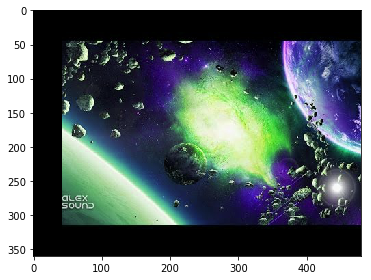

In [29]:
print(imshow('v3.png'))

Негатив

In [30]:
nr = 255 - r
ng = 255 - g
nb = 255 - b

filter = dstack ((nr,ng,nb))
imsave('v4.png', filter)


AxesImage(14.36,27.8;406.84x245.702)


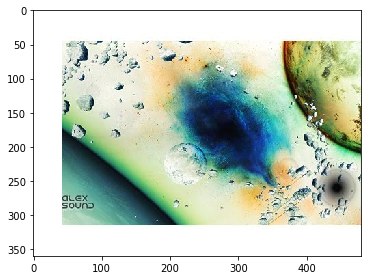

In [31]:
print(imshow('v4.png'))

Прогудин-Горский "Окрашивание чб снимка по каналам"

In [32]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float

In [33]:
def show_img(img):
    print(imshow(img))
    
def save_img(img, filename):
    imsave(filename, img)

In [34]:
from numpy import dstack

def mix_rgb(red, green, blue):
    return dstack((red, green, blue))

In [35]:
from numpy import roll

def shift_img(img1, img2):
    """
    img1 - изображение, которое будет сдвигаться
    img2 - изображение, относительно которого будет сдвиг
    """
    
    corr = 0
    shift = {
        "x": 0,
        "y": 0
    }
    
    shift_limits = 15

    for y in range(-shift_limits, shift_limits):
        shift_y_img = roll(img1, y, 0)
        
        for x in range(-shift_limits, shift_limits):
            shift_x_img = roll(shift_y_img, x, 1)
            shift_corr = (shift_x_img * img2).sum()
            if shift_corr > corr:
                corr = shift_corr
                shift['y'], shift['x'] = y, x
                
    return roll(roll(img1, shift['y'], 0), shift['x'], 1)

In [36]:
def cut_rgb(img, border_k = 5):
    """
    border_k - процент обрезки изображения по краям
    """
    
    img_f = img_as_float(img)
    
    border = border_k / 100
    
    channel = {
        "height": int(img_f.shape[0]//3),
        "width": img_f.shape[1]
    }
    
    cut = int(border * channel["width"])

    b = img_f[cut:channel["height"]-cut, cut:channel["width"] - cut]
    g = img_f[channel["height"] + cut:2*channel["height"] - cut,cut:channel["width"] - cut]
    r = img_f[2 * channel["height"]+cut:3*channel["height"] - cut,cut:channel["width"] - cut]
    
    return r, g, b

In [37]:
def colour_proscuding_image(imgpath):
    img = imread(orginal_image_path)
    img_r, img_g, img_b = cut_rgb(img)
    
    shift_b = shift_img(img_b, img_r)
    shift_g = shift_img(img_g, img_r)
    
    colored_image = mix_rgb(img_r, shift_g, shift_b)
    show_img(colored_image)

In [38]:
orginal_image_path = '2.png'

img = imread(orginal_image_path)

AxesImage(10.8,27.8;410.4x245.57)


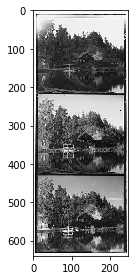

In [39]:
show_img(img)

AxesImage(10.8,27.8;410.4x245.9)


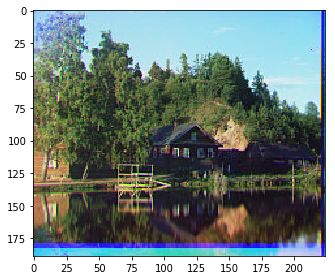

In [40]:
colour_proscuding_image(orginal_image_path)